In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier


In [2]:
data = pd.read_csv("loan_data.csv")
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
print(data['Gender'].value_counts(), '\n')
print(data['Married'].value_counts(), '\n')
print(data['Dependents'].value_counts(), '\n')
print(data['Education'].value_counts(), '\n')
print(data['Self_Employed'].value_counts(), '\n')
print(data['Property_Area'].value_counts(), '\n')
print(data['Loan_Status'].value_counts())


Male      489
Female    112
Name: Gender, dtype: int64 

Yes    398
No     213
Name: Married, dtype: int64 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

No     500
Yes     82
Name: Self_Employed, dtype: int64 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 

Y    422
N    192
Name: Loan_Status, dtype: int64


# Preprocessing

In [5]:
data['Gender'] = data['Gender'].replace(['Female', 'Male'], [0, 1])
data['Married'] = data['Married'].replace(['No', 'Yes'], [0, 1])
data['Dependents'] = data['Dependents'].replace(['0', '1', '2', '3+'], [0, 1, 2, 3])
data['Education'] = data['Education'].replace(['Not Graduate', 'Graduate'], [0, 1])
data['Self_Employed'] = data['Self_Employed'].replace(['No', 'Yes'], [0, 1])
data['Property_Area'] = data['Property_Area'].replace(['Rural', 'Semiurban', 'Urban'], [1, 2, 3])
data['Loan_Status'] = data['Loan_Status'].replace(['N', 'Y'], [0, 1])


In [6]:
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,3,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,3,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,3,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,3,1


In [7]:
data.describe()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.813644,0.651391,0.762938,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,2.037459,0.687296
std,0.389718,0.476920,1.015216,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,3.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,3.000000,1.000000


Correlation Matrix

In [8]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.00,0.37,0.18,-0.05,-0.01,0.05,0.08,0.11,-0.08,0.02,-0.02,0.02
Married,0.37,1.00,0.34,-0.01,0.00,0.05,0.08,0.15,-0.10,0.00,0.00,0.09
Dependents,0.18,0.34,1.00,-0.06,0.06,0.12,0.03,0.16,-0.10,-0.05,0.01,0.01
Education,-0.05,-0.01,-0.06,1.00,0.01,0.14,0.06,0.17,0.08,0.08,0.07,0.09
Self_Employed,-0.01,0.00,0.06,0.01,1.00,0.14,-0.01,0.12,-0.04,0.00,-0.03,-0.00
ApplicantIncome,0.05,0.05,0.12,0.14,0.14,1.00,-0.12,0.57,-0.05,-0.01,-0.01,-0.00
CoapplicantIncome,0.08,0.08,0.03,0.06,-0.01,-0.12,1.00,0.19,-0.06,-0.00,0.01,-0.06
LoanAmount,0.11,0.15,0.16,0.17,0.12,0.57,0.19,1.00,0.04,-0.01,-0.05,-0.04
Loan_Amount_Term,-0.08,-0.10,-0.10,0.08,-0.04,-0.05,-0.06,0.04,1.00,0.00,-0.08,-0.02
Credit_History,0.02,0.00,-0.05,0.08,0.00,-0.01,-0.00,-0.01,0.00,1.00,-0.00,0.56


In [9]:
# Dropping weakly correlated columns

data.drop(['Loan_ID'], axis=1, inplace=True)
data.drop(['Dependents'], axis=1, inplace=True)
data.drop(['Self_Employed'], axis=1, inplace=True)
data.drop(['ApplicantIncome'], axis=1, inplace=True)


In [10]:
data.isnull().sum()


Gender               13
Married               3
Education             0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Replacing Missing Values

In [11]:
# .mode() -> return object and we need the frist val so .mode().iloc[0] or just mode()[0]
data['Gender'].fillna(data.Gender.mode()[0], inplace=True)
data['Married'].fillna(data.Married.mode()[0], inplace=True)
data['LoanAmount'].fillna(data.LoanAmount.std(), inplace=True)
data['Loan_Amount_Term'].fillna(data.Loan_Amount_Term.mode()[0], inplace=True)
data['Credit_History'].fillna(data.Credit_History.mode()[0], inplace=True)


In [12]:
data.isnull().sum()


Gender               0
Married              0
Education            0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Splitting Data

In [13]:
X = data.drop('Loan_Status', axis=1)
Y = data['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=1)


# Data scaling

In [14]:
scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)
x_train.head()


,Gender,Married,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,1.0,0.000000,0.170767,0.74359,0.0,0.5
1,1.0,0.0,1.0,0.000000,0.125904,0.74359,1.0,1.0
2,0.0,1.0,1.0,0.058824,0.146165,0.74359,1.0,1.0
3,0.0,0.0,1.0,0.000000,0.089725,0.74359,1.0,0.0
4,0.0,0.0,1.0,0.000000,0.183792,0.74359,0.0,0.5


# Principal Component Analysis

In [15]:
pca = PCA(n_components=3)

X_train = pca.fit_transform(x_train)
X_test = pca.fit_transform(x_test)

explained_variance = pca.explained_variance_ratio_


# Logistic Regression
(with PCA)

In [16]:
lr = LogisticRegression(solver='liblinear', random_state=1)
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [17]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)
print("Classification Report: \n", classification_report(y_test, y_pred))


Confusion Matrix: 
 [[ 4 35]
 [ 0 84]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.10      0.19        39
           1       0.71      1.00      0.83        84

    accuracy                           0.72       123
   macro avg       0.85      0.55      0.51       123
weighted avg       0.80      0.72      0.62       123



In [18]:
print("Accuracy:", lr.score(X_test, y_test))
print("\nMean Squared Error: ", mean_squared_error(y_test, y_pred))


Accuracy: 0.7154471544715447

Mean Squared Error:  0.2845528455284553


# Logistic Regression
(without PCA)

In [19]:
lr = LogisticRegression(solver='liblinear', random_state=1)
lr = lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("Accuracy:", lr.score(x_test, y_test))
print("\nMean Squared Error: ", mean_squared_error(y_test, y_pred))


Accuracy: 0.8048780487804879

Mean Squared Error:  0.1951219512195122


# SVM

In [20]:
classifier = svm.LinearSVC()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)


In [21]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)
print("Classification Report: \n", classification_report(y_test, y_pred))


Confusion Matrix: 
 [[16 23]
 [ 2 82]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.41      0.56        39
           1       0.78      0.98      0.87        84

    accuracy                           0.80       123
   macro avg       0.83      0.69      0.71       123
weighted avg       0.82      0.80      0.77       123



In [22]:
print("Accuracy:", classifier.score(x_test, y_test))
print("\nMean Squared Error: ", mean_squared_error(y_test, y_pred))


Accuracy: 0.7967479674796748

Mean Squared Error:  0.2032520325203252


# Decision Tree

In [23]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [24]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)
print("Classification Report: \n", classification_report(y_test, y_pred))


Confusion Matrix: 
 [[18 21]
 [ 3 81]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.46      0.60        39
           1       0.79      0.96      0.87        84

    accuracy                           0.80       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.81      0.80      0.79       123



In [25]:
print("Accuracy:", clf.score(x_test, y_test))
print("\nMean Squared Error: ", mean_squared_error(y_test, y_pred))


Accuracy: 0.8048780487804879

Mean Squared Error:  0.1951219512195122


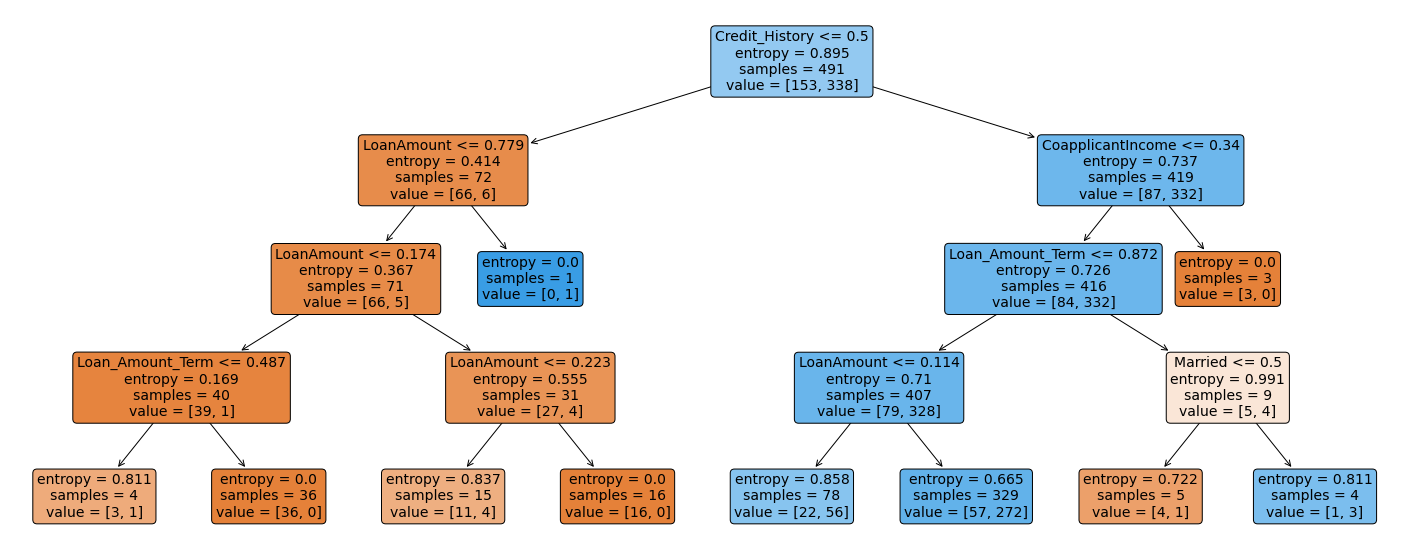

In [26]:
plt.figure(figsize=(25, 10))
a = plot_tree(clf,
              feature_names=x_train.columns,
              filled=True,
              rounded=True,
              fontsize=14)


# Random Forest

In [27]:
clf = RandomForestClassifier(n_estimators=2000, random_state=1, max_depth=4)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [28]:
print("Accuracy:", clf.score(x_test, y_test))
print("\nMean Squared Error: ", mean_squared_error(y_test, y_pred))


Accuracy: 0.8130081300813008

Mean Squared Error:  0.18699186991869918


# Naive bayes

In [29]:
clf = BernoulliNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [30]:
print("Accuracy:", clf.score(x_test, y_test))
print("\nMean Squared Error: ", mean_squared_error(y_test, y_pred))


Accuracy: 0.8048780487804879

Mean Squared Error:  0.1951219512195122


# KNN

In [31]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)


In [32]:
print("Accuracy:", knn.score(x_test, y_test))
print("\nMean Squared Error: ", mean_squared_error(y_test, y_pred))


Accuracy: 0.7967479674796748

Mean Squared Error:  0.2032520325203252
